In [3]:
import pandas as pd 

In [8]:
pip install seaborn

     |████████████████████████████████| 292 kB 20.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 22.2 MB/s            2 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 42.2 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=04c029491fccbba0d5c088080602188471057413f0caedbca0aed6cbd32ab3f6
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 19.9 MB/s            
     |████████████████████████████████| 233 kB 44.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('datasets2/reg_data.csv')

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import numpy as np
from sklearn import linear_model

## 1. Is there any effect of age on salary. Use regression model to answer the question.
## salary b0 + b1 * Age
## y = c + mx

In [5]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [20]:
df.dropna(inplace = True)
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [21]:
y = pd.DataFrame(df['Salary'])
x = pd.DataFrame(df['Age'])

lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm
       

LinearRegression()

In [26]:
print('The y intercept, b0 is = ', model_lm.intercept_) 
print('The coef., b1 is = ' , model_lm.coef_)
print('The R^2 is = ', model_lm.score(x,y))

The y intercept, b0 is =  [349.44580104]
The coef., b1 is =  [[48.09321584]]
The R^2 is =  0.380484541757693


In [ ]:
# Salary = 349.44580104 + 48.09321584 * Age

In [49]:
modelA = sm.OLS.from_formula('Salary ~ Age + Gender', data = df)
resultA = modelA.fit() 
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        20:24:24   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salary = 749.8157 + 34.2211 * Age +
Gende_Male * 306.7169

1. What is th Salary of a Male person with age 42

In [50]:
print('The salary of a male person with Age 42 is: ', 
       749.8157 + 34.2211 * 42 + 1 * 306.7169)
      

The salary of a male person with Age 42 is:  2493.8188


In [51]:
print('The salary of a male person with Age 42 is: ', 
       749.8157 + 34.2211 * 42 + 0 * 306.7169)
      

The salary of a male person with Age 42 is:  2187.1019


## What is the Salary of a person with age 33?

In [31]:
print('Salary of a 33 years person is: ',  349.44580104 + 48.09321584 * 33)

Salary of a 33 years person is:  1936.52192376


In [34]:
print('The residual of first two data are : ', 1500 - 1936.52192376 , 1200 - 1936.5219 )

The residual of first two data are :  -436.52192375999994 -736.5219


In [38]:
resiA = resultA.resid
resiA


0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

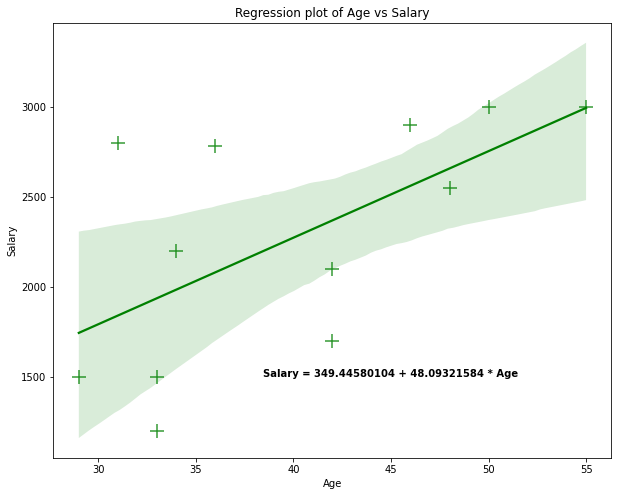

In [48]:
plt.figure(figsize = (10,8))
ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df,
                 color = 'green',
                 marker = '+',
                 scatter_kws = {'s':200}
                )
ax.set(xlabel = 'Age',
      ylabel = 'Salary')

ax.text(45, 1500, 'Salary = 349.44580104 + 48.09321584 * Age',
        horizontalalignment = 'center', size = 'medium',
        color = 'black' , weight = 'semibold')

ax.set_title('Regression plot of Age vs Salary')
plt.show()

## Conclusion:
## The Salary not only depends on Age, but also, some other variables as well
## salary = b0 + b1 * Age + b2 * Gender

In [ ]:

df